<a href="https://colab.research.google.com/github/dsnnaveen/AirnbBookingAnalysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

importing required libraies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importing data set into dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eda capstone project /Airbnb NYC 2019.csv')

In [ ]:
df.shape


checking the top five rows

In [ ]:
df.head()

getting summary about numerical columns of the data frame

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

TAKING NECESSARY COLUMNS

In [ ]:
new_df = df[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights',
             'number_of_reviews','calculated_host_listings_count','availability_365']]
new_df.head(5)

1. What can we learn about different hosts and areas?


In [ ]:
hosts_areas = new_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

As we can see most number of listings are from Manhattan created Sonder (NYC), Blueground, Kara , Kazuya

2. What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [ ]:
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

##From the above Analysis we can say that most people prefer to stay in place where price is less.

3.Which hosts are the busiest and why?

In [49]:
busiest_hosts = new_df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


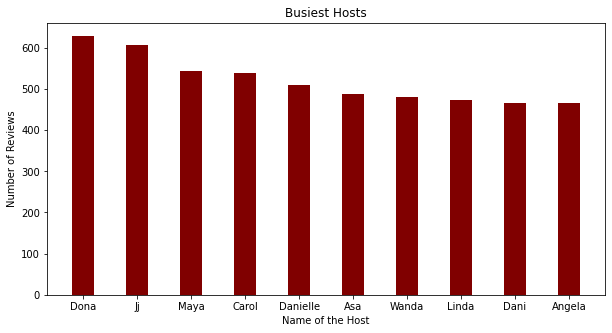

In [50]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

###Busiest hosts are:
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [51]:
traffic_areas = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


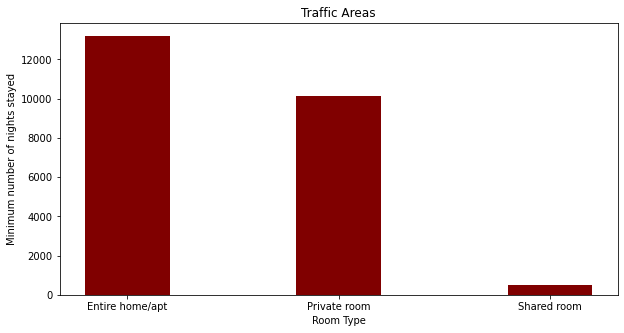

In [52]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

###From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.

##Conclusion:
###1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.
###2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.
###3. Most people prefer to pay less price.
###4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.
###5. If people are not staying more then one night means they are travellers.

Thanks